<a href="https://colab.research.google.com/github/benigmatic/Quantum-circuits/blob/main/Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Deutsch's problem

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
from qiskit.visualization import plot_bloch_multivector,plot_bloch_vector, plot_histogram
from qiskit.quantum_info import Statevector
import numpy as np 
import matplotlib
from qiskit.quantum_info import partial_trace, Statevector

In [ ]:
# Settin gup a simulator
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024


In [ ]:
# Creating a circuit
qreg1 = QuantumRegister(2) # The quantum register of the qubits, in this case 2 qubits
register1 = ClassicalRegister(1) 

qc = QuantumCircuit(qreg1, register1)


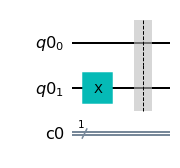

In [ ]:
#State 0
qc.x(1)
qc.barrier()
qc.draw(output='mpl') 

In [ ]:
full_statevector = Statevector(qc)
print(full_statevector)

Statevector([0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
            dims=(2, 2))


In [ ]:
"""
The initial state is |00> |00> . We apply  x gate so that the input would be transformed into |00> |10>

"""

'\nThe initial state is |00> |00> . We apply  x gate so that the input would be transformed into |00> |10>\n\n'

In [ ]:
# This statevoctor shows the qubit 1 being set to 0, and qubit 1 set to one as expected at the state 0

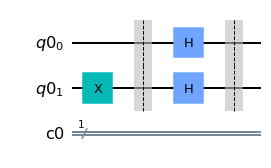

In [ ]:
# State 1
qc.h(0)
qc.h(1)
qc.barrier()
qc.draw(output='mpl') 

In [ ]:
full_statevector = Statevector(qc)
print(full_statevector)

Statevector([ 0.5+0.j,  0.5+0.j, -0.5+0.j, -0.5+0.j],
            dims=(2, 2))


In [ ]:
"""
Hadamard gate was applied to both of the qubit transforming |0>|1>.
The output is: 1/(square root of 2) *(|00> - |01> + |01> - |11>) or (|0> - |1>)/(square root of 2)
"""

'\nHadamard gate was applied to both of the qubit transforming |0>|1>.\nThe output is: 1/(square root of 2) *(|00> - |01> + |01> - |11>) or (|0> - |1>)/(square root of 2)\n'

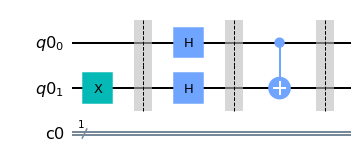

In [ ]:
#We can implement the CNOT gate as a balanced oracle
# State 2
qc.cx(0,1)
qc.barrier()
qc.draw(output='mpl')

In [ ]:
full_statevector = Statevector(qc)
print(full_statevector)

Statevector([ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j],
            dims=(2, 2))


In [ ]:
"""
The CNOT gate transformed intial state 1/(square root of 2) *(|00> - |01> + |01> - |11>)  into
 1/2 *(|00> - |01> + |10> - |11>)
"""

'\nThe CNOT gate transformed intial state 1/(square root of 2) *(|00> - |01> + |01> - |11>)  into\n 1/2 *(|00> - |01> + |10> - |11>)\n'

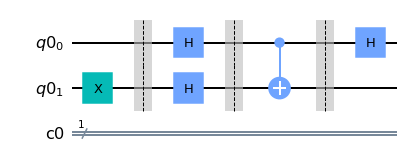

In [ ]:
# state 3: apply the Hadamard gate to the first qubit
qc.h(0)
qc.draw(output='mpl')

In [ ]:
full_statevector = Statevector(qc)
print(full_statevector)

Statevector([ 0.        +0.j,  0.70710678+0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))


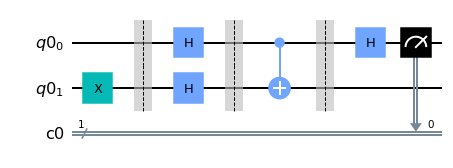

In [ ]:
# measure the circuit. We expect the probability of measure in the first qubit to be 1.
#This confirmes that the CNOT gate is balanced
qc.measure(qreg1[0],register1)
qc.draw(output='mpl') 

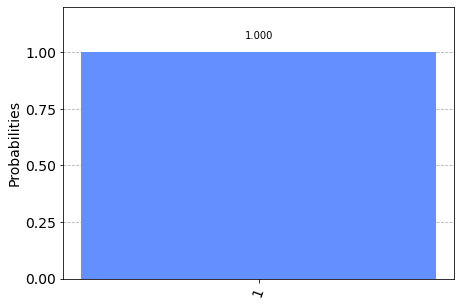

In [ ]:
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)


In [ ]:
# As expected, the resut produced is 1, proving that the CNOT is balanced.

In [ ]:
# 2. Deutsch-Jozsa problem
from qiskit import QuantumCircuit as QC

In [ ]:
# Oracle function
def oracle(case, n):
    ##creating an oracle
    oracle_qc = QC(n+1)
    if case=="balanced":
        for i in range(n):
            oracle_qc.cx(i,n)
    if case=="constant":
        pass
    
    ##converting circuit to a indivsual gate
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"
    
    return oracle_gate
        

Statevector([0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


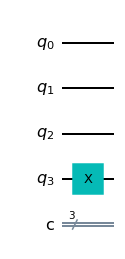

In [ ]:
#Creating a circuit
#State 0
n = 3

dj_crc = QuantumCircuit(n+1,n)
dj_crc.x(n)
full_statevector = Statevector(dj_crc)
print(full_statevector)
dj_crc.draw('mpl')

Statevector([ 0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,  0.25+0.j,
              0.25+0.j,  0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j,
             -0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j, -0.25+0.j,
             -0.25+0.j],
            dims=(2, 2, 2, 2))


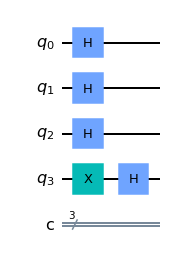

In [ ]:
#State 1
for i in range(n):
        dj_crc.h(i)

dj_crc.h(n)
full_statevector = Statevector(dj_crc)
print(full_statevector)
dj_crc.draw('mpl')

Statevector([ 0.25+0.j, -0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j,
              0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j,  0.25+0.j,
              0.25+0.j, -0.25+0.j,  0.25+0.j, -0.25+0.j, -0.25+0.j,
              0.25+0.j],
            dims=(2, 2, 2, 2))


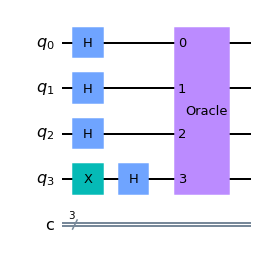

In [ ]:
# State 2
# Oracle
rnd = np.random.randint(2)
if rnd == 0:
    case = "constant"
else:
    case = "balanced"
dj_oracle = oracle(case, n)
dj_crc.append(dj_oracle, range(n+1))
full_statevector = Statevector(dj_crc)
print(full_statevector)
dj_crc.draw('mpl')

Statevector([ 0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.70710678+0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
              0.        +0.j,  0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2, 2, 2))


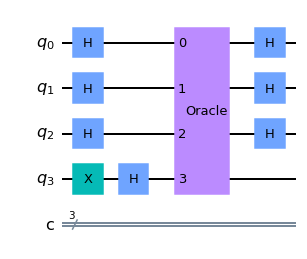

In [ ]:
# State: 3
for i in range(n):
        dj_crc.h(i)
full_statevector = Statevector(dj_crc)
print(full_statevector)
dj_crc.draw('mpl')

In [ ]:
for i in range(n):
        dj_crc.measure(i,i)


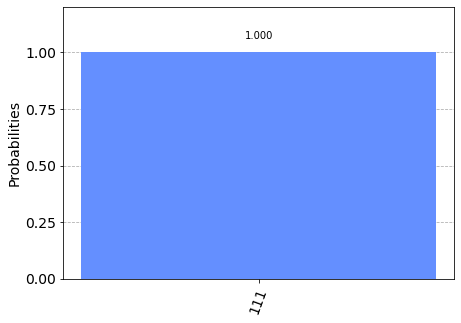

In [ ]:
#simulating
backend=BasicAer.get_backend('qasm_simulator')
shots = 1024

results = execute(dj_crc, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer)


In [ ]:
# 3. Simon's problem
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector


Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j,
             0.+0.j, 0.+0.j],
            dims=(2, 2, 2, 2))


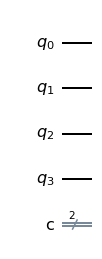

In [ ]:
# Creating a circuit
imon = QuantumCircuit(4,2)
# State 1
full_statevector = Statevector(simon)
print(full_statevector)
simon.draw(output='mpl')

Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j,
             0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
             0. +0.j, 0. +0.j],
            dims=(2, 2, 2, 2))


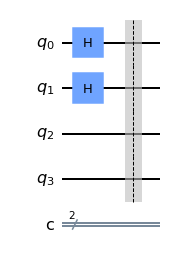

In [ ]:
#State 2
simon.h(0)
simon.h(1)
simon.barrier()

full_statevector = Statevector(simon)
print(full_statevector)
simon.draw(output='mpl')

Statevector([0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j,
             0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j,
             0.5+0.j, 0. +0.j],
            dims=(2, 2, 2, 2))


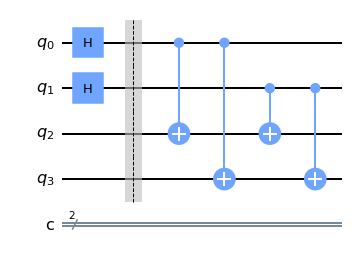

In [ ]:
# State 3
# Oracle
simon.cx(0,2)
simon.cx(0,3)
simon.cx(1,2)
simon.cx(1,3)

full_statevector = Statevector(simon)
print(full_statevector)
simon.draw(output='mpl')

Statevector([0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j,
             0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0.5+0.j,
             0.5+0.j, 0. +0.j],
            dims=(2, 2, 2, 2))


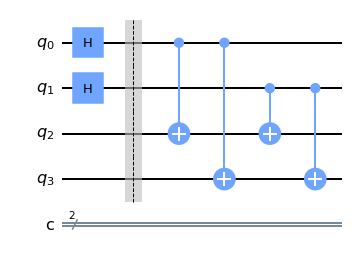

In [ ]:
# State 4
# the measurment will be completed in the end, 
#so that it would be possible to print the statevectors for the rest of the states
"""simon.measure(2,0)
simon.measure(3,1)"""

full_statevector = Statevector(simon)
print(full_statevector)
simon.draw(output='mpl')

Statevector([ 0.5+0.j,  0. +0.j,  0. +0.j,  0.5+0.j,  0. +0.j,  0. +0.j,
              0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,
              0.5+0.j,  0. +0.j,  0. +0.j, -0.5+0.j],
            dims=(2, 2, 2, 2))


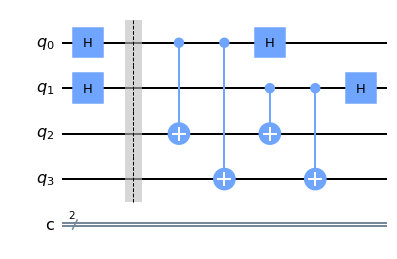

In [ ]:
# State 5
simon.h(0)
simon.h(1)

full_statevector = Statevector(simon)
print(full_statevector)
simon.draw(output='mpl')

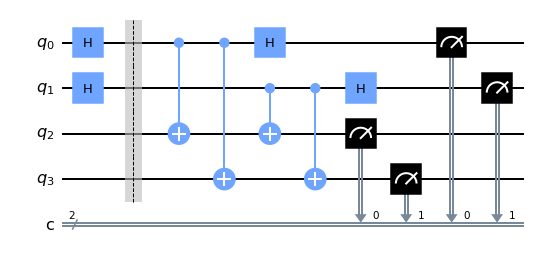

In [ ]:
# State 6:
simon.measure(2,0)
simon.measure(3,1)
simon.measure(0,0)
simon.measure(1,1)
simon.draw(output='mpl')

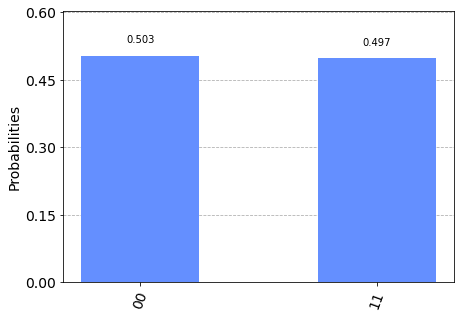

In [ ]:
backend = BasicAer.get_backend('qasm_simulator')
shots= 1024
results = execute(simon, backend=backend, shots= shots).result()
counts = results.get_counts()
plot_histogram(counts)

In [ ]:
"""The results show that this is a two to one oracle"""

'The results show that this is a two to one oracle'

In [ ]:
# 4. Grover's algorithm (for 2 qubits)

In [ ]:
#initialization
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram


In [ ]:
n = 2
grover_circuit = QuantumCircuit(n)

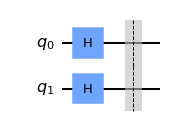

In [ ]:
#State
grover_circuit.h(0)
grover_circuit.h(1)
grover_circuit.barrier()
grover_circuit.draw(output='mpl')


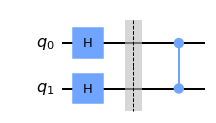

In [ ]:
grover_circuit.cz(0,1) # Oracle
grover_circuit.draw(output='mpl')


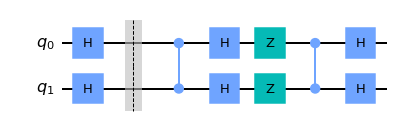

In [ ]:
# Diffuser (amplification)
# Diffusion operator (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw(output='mpl')

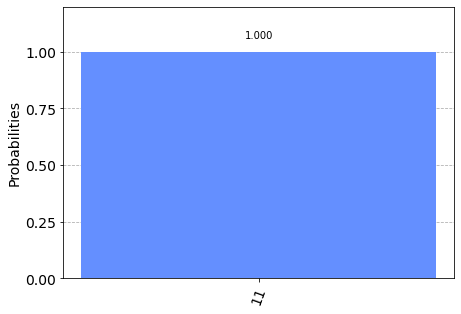

In [ ]:
grover_circuit.measure_all()

aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)
